In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
#['用户ID'，'购买日期', '订单数量', '订单金额]

In [2]:
names = ['user_id', 'order_dt', 'order_products', 'order_amount']
data = pd.read_csv('C:/Users/32947/Desktop/DataAnalysis/dataset/CDNOW.txt', names=names, sep='\s+' )
data.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
data.describe()#特殊情况：订单数量为1，订单金额为0

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [4]:
data.info()#主要是查看数据集中有没有缺失值出现的情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
data['order_date'] = pd.to_datetime(data['order_dt'], format='%Y%m%d')#转换格式,int格式-->datetime格式
data['month'] = data.order_date.astype('datetime64[M]')#后期分析按月作为消费频率

In [6]:
data.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


单个用户消费分析：

In [7]:
user_grouped = data.groupby('user_id').sum()
user_grouped.head(10)

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61
6,19970101,1,20.99
7,59921434,18,264.67
8,159775420,18,197.66
9,59921222,6,95.85


In [8]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


对比均值(106)和中位数(43)，相差较大，说明存在一部分高级用户

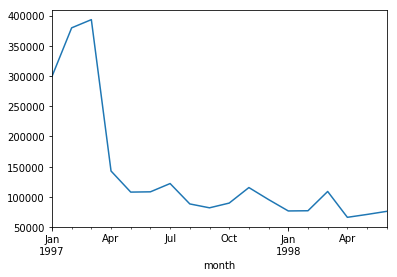

In [9]:
data.groupby('month').order_amount.sum().plot()#月消费曲线

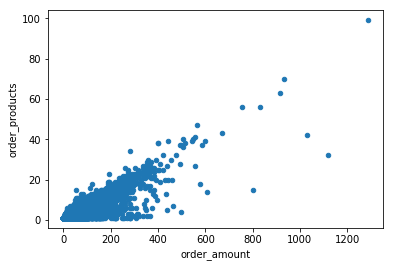

In [10]:
data.plot.scatter(x = 'order_amount', y = 'order_products')
#每笔订单的散点图，从月消费曲线可以发现，前期的消费水平很高，但是滑落很快，什么原因导致的呢？

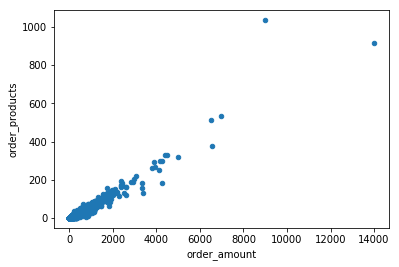

In [11]:
data.groupby('user_id').sum().plot.scatter(x = 'order_amount', y = 'order_products')#每个用户消费散点图

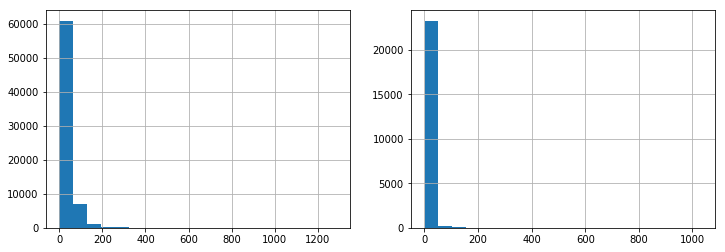

In [12]:
plt.figure(figsize = (12,4))
plt.subplot(121)
data.order_amount.hist(bins = 20)
plt.subplot(122)
data.groupby('user_id').order_products.sum().hist(bins = 20)
plt.show()

从直方图中可以看到，普通用户占了消费人群的绝大多数

In [13]:
data.groupby('user_id').month.min().value_counts()#初次消费月份

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [14]:
data.groupby('user_id').month.max().value_counts()#用户最后消费的月份

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

用户生命周期：

In [15]:
#第一次消费至最后一次消费时间之差为用户的生命周期
user_purchase = data[['user_id','order_products','order_amount','order_date']]
order_date_min = user_purchase.groupby('user_id').order_date.min()
order_date_max = user_purchase.groupby('user_id').order_date.max()
(order_date_max-order_date_min).head(10)#确定每位用户的生命周期

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

In [16]:
(order_date_max-order_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

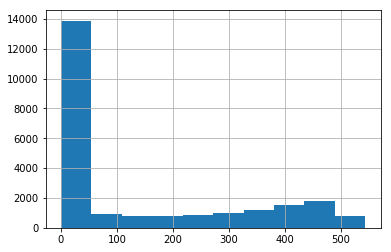

In [17]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=10)

In [18]:
life_time=(order_date_max-order_date_min).reset_index()
life_time.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


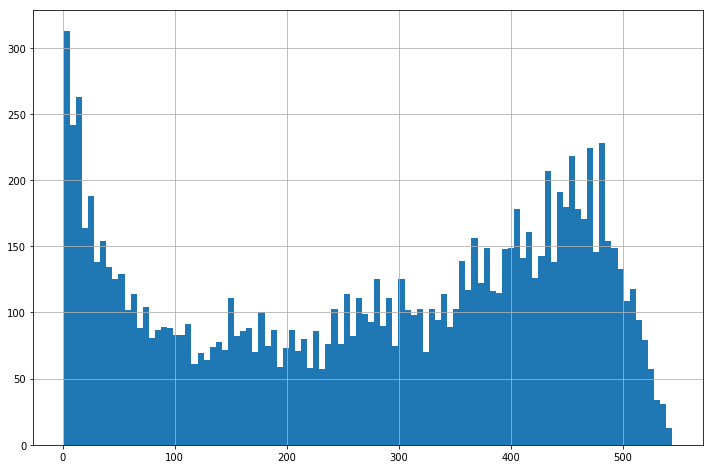

In [19]:
life_time['life_time']=life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins=100,figsize=(12,8))#清除只消费一次的用户